In [1]:
import os
from PIL import Image
import pyocr
import numpy as np
import pyocr.builders
import matplotlib.pyplot as plt
import math

In [15]:
# target = "normal"
# target = "wide"
target = "fastlate"

In [16]:
path_tesseract = "C:\\Program Files\\Tesseract-OCR"
if path_tesseract not in os.environ["PATH"].split(os.pathsep):
    os.environ["PATH"] += os.pathsep + path_tesseract

tools = pyocr.get_available_tools()
tool = tools[0]

In [17]:
img = Image.open("./" + target + "/target.png")
rgb_img = img.convert('RGB')
size = rgb_img.size

In [18]:
border = 215
yuBorder = size[1] - size[1] / 6
ytBorder = size[1] / 6
xtBorder = size[0] / 2

In [19]:
img2 = Image.new('RGBA',size)

for x in range(size[0]):
    for y in range(size[1]):
        r,g,b = rgb_img.getpixel((x,y))
        
        # 下側の1/6を黒塗り
        if y >= yuBorder:
            g = 0
        # 右半分の上側1/6を黒塗り
        elif y <= ytBorder and x >= xtBorder:
            g = 0
        # 結構明るめなやつ以外をを黒塗り
        elif r >= border and g >= border and b >= border:
            g = 255
        # 後はしろぉー
        else:
            g = 0

        img2.putpixel((x,y),(g,g,g,255))

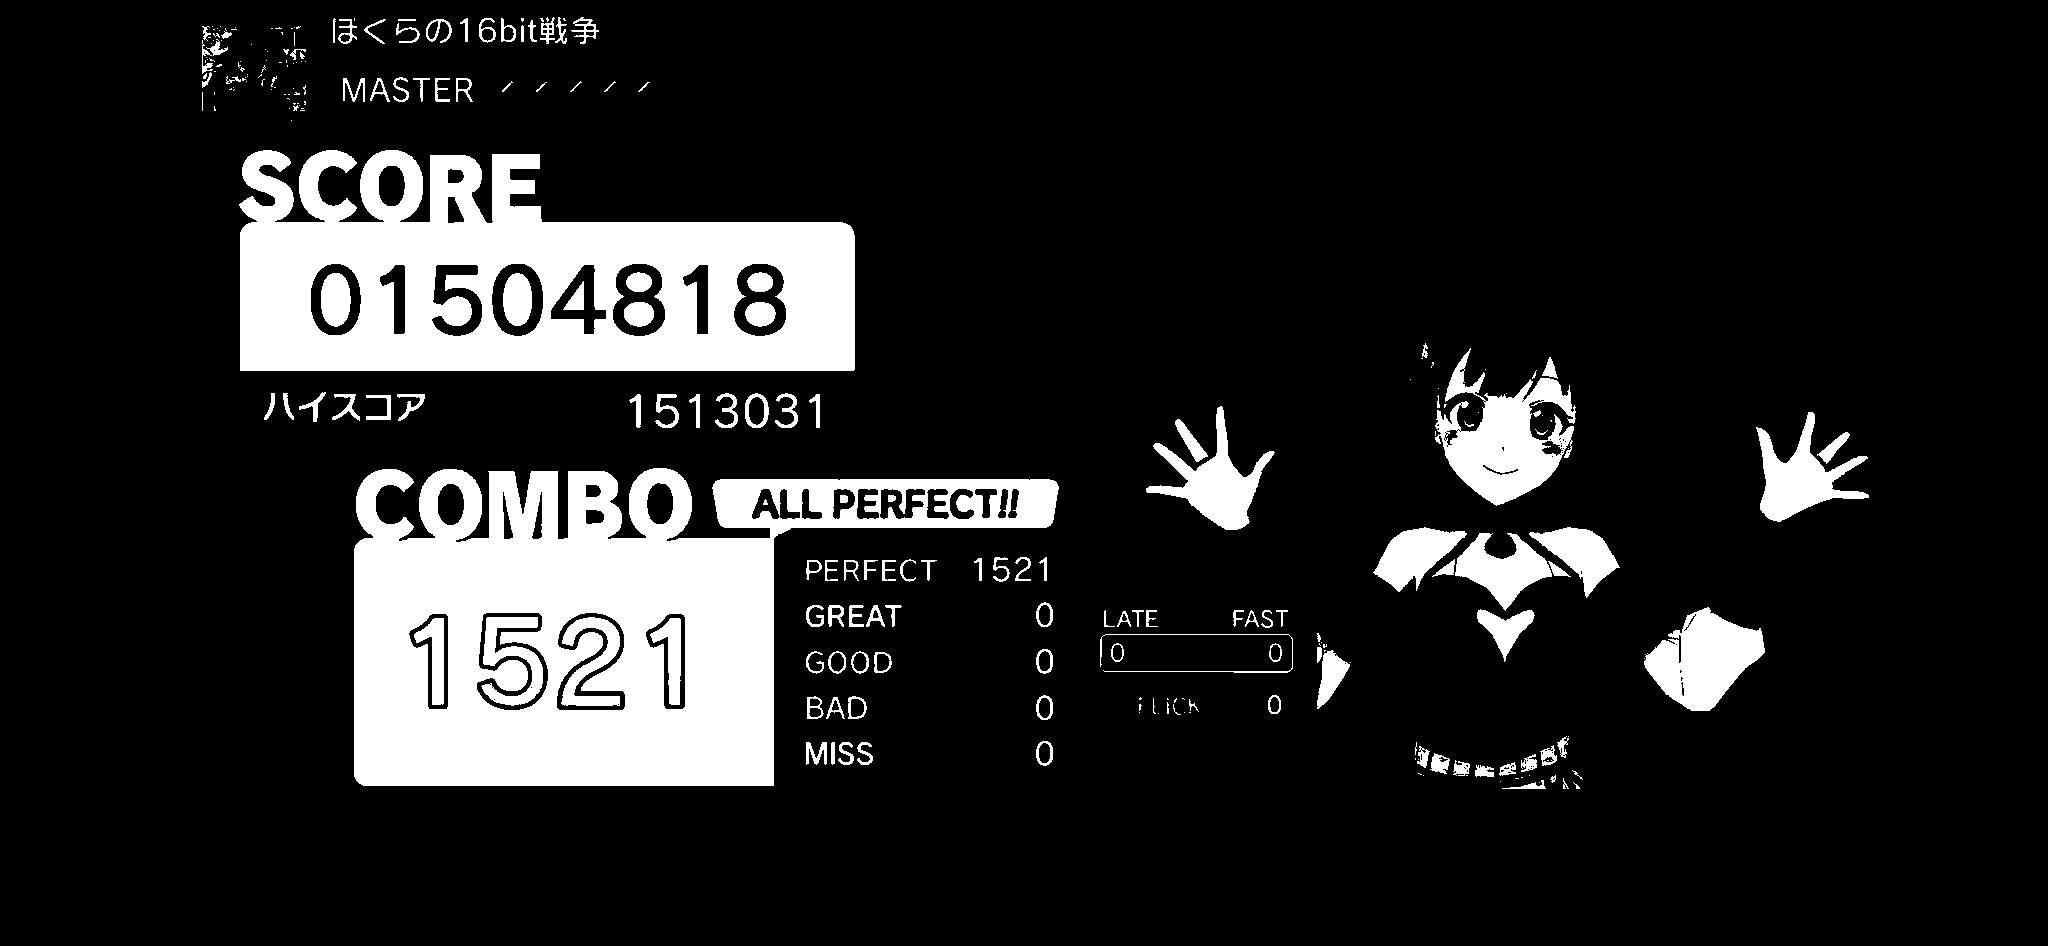

In [20]:
img2.save("./" + target + "/result.png")

img2

In [21]:
builder = pyocr.builders.TextBuilder(tesseract_layout=11)
result = tool.image_to_string(img2, lang="jpn", builder=builder)

print(result)

は

ほくぐくらの16bit戦争

4

を を

= MASTER フフフンレン

01504818

人バイスコア

1513031

JIV

人⑱ 曲 ALLPERFECTJ

影

PERFECT 1521

GREAT

0

LATE

FAST

のや

15る1

GOOD

BAD

ーー   8 ル

MISS

キー
